# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Keep the file names when saving to GitHub. It's always possible to go back to a previous version, you are not losing anything.
3. Run all the cells before saving to GitHub so the output is saved.
4. Graphs without labels (or units when appropriate) are not worth any point.
5. Do put in sufficient explanatory comments in your code.

For this week you can use these imports at the start of your programs:

In [1]:
# Import the numpy library, aliasing it as 'np' for numerical operations.
import numpy as np
# Import specific functions from numpy.random: random (uniform), normal (Gaussian), and seed (for reproducibility).
from numpy.random import random, normal, seed
# Import the matplotlib.pyplot module, aliasing it as 'plt' for plotting.
import matplotlib.pyplot as plt

**DO NOT** ```import *```. As your programs get more complex you will generally need to import a greater range of modules, and it's important to keep them separate.

# Introduction
Most physicists are unlikely to go gambling at Monte Carlo - even if they were paid enough. Our knowledge of statistics is sufficient warning. But that doesn’t stop physicists using the _Monte Carlo method_ extensively for maths and physics problems.

As the name suggests, the Monte Carlo (MC) method is based on using randomness. At first sight, this seems counter intuitive - surely random numbers can only lead to more randomness? As a very simple illustration of how to use random numbers in a calculation, consider the following problem.

Suppose you have a circular pond of of unit radius, placed exactly in a square area of grass.

Imagine throwing $N$ stones randomly into the square area. What number $n$ would land in the pond? Clearly we know the theoretical answer in this case - it just depends on the ratio area of the pond and square, so $n = N\pi/4$. But suppose you didn’t already know a value for $\pi$. Then by finding the ratio $4n/N$ you will have an approximation to $\pi$ which depends only on using random numbers (and, as we’ll see shortly, Pythagoras’ theorem).

To implement this idea in python you can make use of the following code snippet:

In [2]:
# Set the total number of random points to generate for the Monte Carlo simulation.
N=int(1e7)
# Initialize a counter 'n' to store the number of points falling within the circle.
n=0
# Loop N times to generate random points.
for i in range (N):
    # Generate a random x-coordinate in the range [-1, 1).
    x = 2*random()-1
    # Generate a random y-coordinate in the range [-1, 1).
    y = 2*random()-1
    # Calculate the distance 'r' from the origin (0,0) to the point (x,y) using Pythagoras' theorem.
    r = np.sqrt(x*x+y*y)
    # Check if the point falls within the unit circle (radius <= 1.0).
    if r <= 1.0:
        # If it does, increment the counter 'n'.
        n+=1 # adds 1 to n
# Approximate pi using the ratio of points inside the circle to total points, scaled by 4.
print(4*n/N)

3.1418336


The function random returns a random real number uniformly distributed in the range $[0,1)$, so $x$ and $y$ lie in the range $[-1,1)$ here. Investigate what value of $\pi$ you get, and how it depends on the number $N$ that you pick. (You could repeat for different values of $N$ and plot a graph of $\pi$ versus $N$.) Note that you don’t really need to take the square root in this case as we are dealing with a unit circle. (We could equally just take a circular quadrant instead of a whole circle if we use random number in the interval 0 to 1)

The example above can take some time to run. But the code below, which does the same operations, is much faster:

In [3]:
# Generate N random x and y coordinates simultaneously using numpy's vectorized function.
# The coordinates are scaled to be in the range [-1, 1).
x,y=2*np.random.rand(2,N)-1
# Calculate the radial distance 'r' for all points in a vectorized manner.
r=np.sqrt(x*x+y*y)
# Count the number of points where the radial distance is less than or equal to 1.0 (inside the unit circle).
# np.sum(r <= 1.0) treats True as 1 and False as 0.
n=np.sum(r <= 1.0)
# Approximate pi using the Monte Carlo method.
print(4*n/N)

3.1411716


For the most part the increased speed is due to using _vector instructions_ built-in the `numpy` library. Those cannot be used by a `for` loop.

## Measuring execution speed

To measure the speed of a piece of code, if you are uring IPython/Jupyter (as Colab does), the IPython [magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html) command `%%time` is very useful:

In [4]:
%%time
# This magic command measures the execution time of the entire cell.

# Generate N random x and y coordinates simultaneously using numpy's vectorized function.
# The coordinates are scaled to be in the range [-1, 1).
x,y=2*np.random.rand(2,N)-1
# Calculate the radial distance 'r' for all points in a vectorized manner.
r=np.sqrt(x*x+y*y)
# Count the number of points where the radial distance is less than or equal to 1.0 (inside the unit circle).
n=np.sum(r <= 1.0)
# Approximate pi using the Monte Carlo method.
print(4*n/N)

3.1408492
CPU times: user 404 ms, sys: 102 ms, total: 506 ms
Wall time: 541 ms


Note that the similar-sounding `%%timeit` command will run the cell several time and calculate the average. In the absence of IPython, you can also use the `datetime` module:

In [5]:
# Import the datetime class from the datetime module to measure execution time.
from datetime import datetime
# Record the current time as the start time for performance measurement.
startTime = datetime.now()
# Generate N random x and y coordinates simultaneously using numpy's vectorized function.
# The coordinates are scaled to be in the range [-1, 1).
x,y=2*np.random.rand(2,N)-1
# Calculate the radial distance 'r' for all points in a vectorized manner.
r=np.sqrt(x*x+y*y)
# Count the number of points where the radial distance is less than or equal to 1.0 (inside the unit circle).
n=np.sum(r <= 1.0)
# Approximate pi using the Monte Carlo method.
print(4*n/N)
# Calculate and print the elapsed time by subtracting the start time from the current time.
print(datetime.now() - startTime)

3.1421996
0:00:00.499408


## How random?
It is interesting to plot out some generated random numbers to get a feel for how random they look. You already saw in week 3 of the PX1224 module how to plot out histograms. So we can do something like this...

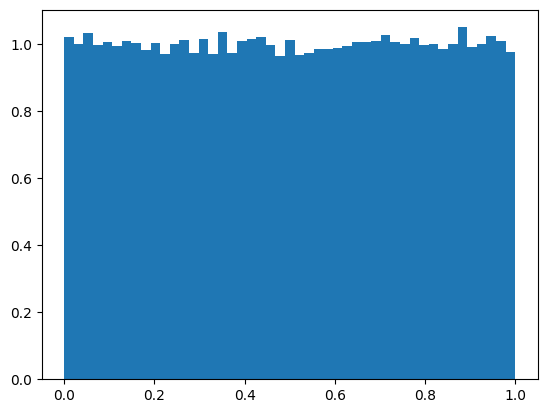

In [6]:
# Make the uniform random data using a loop (demonstrating a less efficient method).
N = int(1e5)
# Initialize an array of zeros to store the random numbers.
x = np.zeros(N)
# Loop N times to generate random numbers and store them in the array.
for i in range(N): # This method is very slow due to explicit looping in Python.
    x[i] = random()
# Plot a histogram of the generated data to visualize its distribution.
# 'bins='auto'' automatically determines the number of bins.
# 'density=True' normalizes the histogram so that the area sums to 1.
plt.hist(x, bins='auto',density=True);

And a neater way to create an array of N random numbers is like this ...

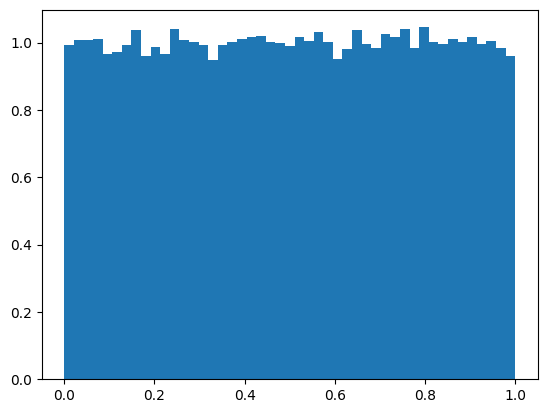

In [7]:
# Make the uniform random data using a vectorized approach (more efficient).
N = int(1e5)
# Generate N random numbers uniformly distributed in [0, 1) directly into an array.
x = random(N)
# Plot a histogram of the generated data to visualize its distribution.
plt.hist(x, bins='auto',density=True);

You’ll see that, to the eye, the data look very uniformly distributed. How are random numbers generated in the computer? In fact, they are not entirely random, but are generated by an algorithm that produces a sequence of numbers that is _pseudo-random_. A great deal of research goes into generating pseudo-random numbers that pass known tests for randomness (rather more sophisticated than just looking at histograms). Take a look at http://www.random.org/ if you want truly random numbers.
One advantage of pseudo-random number generation is that you can always generate the same sequence of numbers again for testing purposes! This is done by using a starting seed. To do this the syntax is:
```python
seed(1234)
```
where you can use any convenient integer starting seed.

## Other probability distributions

The [numpy and scipy documentation](https://numpy.org/doc/stable/reference/random/generator.html#distributions) website gives a good description of other random number distributions, not just the uniform one we’ve looked at so far. For example `y = normal(loc=0.0, scale=1.0, size=N)` will return an array of $N$ numbers with a Gaussian or normal probability distribution, with mean $\mu = 0$ and standard deviation $\sigma = 1$.

# Applications

## Integration in 1-D

One application of the MC method is to the evaluation of integrals. Suppose we select $N$ random numbers $x_0,x_1,x_2,...,x_{N-1}$ in the interval $[0,1)$, then
$$
\int_0^1 f(x)\,dx\approx\frac{1}{N}\sum_{i=0}^{N-1}f(x_i)
$$
This is not the best method in 1-D, since the error in the approximation is of order $1/\sqrt{N}$, and many more points are required for a good estimate of the integral than, for example, the Romberg method. But it turns out to be increasingly beneficial in higher dimensions.

Let’s look at a trivial example. We want to integrate $f(x) = x^2$ between 0 and 1. The relevant code snippet is something like this:

In [8]:
# Define the function f(x) = x^2 that we want to integrate.
def f(x):
    return x**2

# Set the number of random points for the Monte Carlo integration.
N = int(1e3)
# Initialize 's' (sum of f(x) values) to zero.
s = 0 # s is the sum
# Loop N times to perform Monte Carlo integration.
for i in range (N):
    # Generate a random number 'x' uniformly in the interval [0,1).
    x = random() # get a random number in [0,1) ...
    # Add the function value f(x) to the sum 's'.
    s += f(x)
# Calculate the approximate integral as the average value of f(x) over the interval.
integral = s/N
# Print the approximate result along with the number of points used.
print('Approximate result for {} points: {}'.format(N,integral))

Approximate result for 1000 points: 0.32031178181649794


It’s fairly clear why this works, since $s/N$ will be the average value of the function. Multiplying by the interval length, $1$ in this example, thus approximates the integral. If we want the integral between limits (a,b), we would have to multiply the average of the function over this interval by (b-a).
$$
\int_a^b f(x)\,dx\approx(b-a)\frac{1}{N}\sum_{i=0}^{N-1}f(x_i)
$$
Note: **You need to improve the code** by avoiding the loop (i.e. using the vectorised form of
defining random numbers).

## Integration in 2-D

**Simplest case**: It’s easy to extend this idea to 2-D (and higher dimensions). If we have
a 2-D rectangular region $a \leq x \leq b$, $c \leq y \leq d$ then
$$
\int_a^b\int_c^d f(x,y)\,dxdy\approx\frac{(b-a)(c-d)}{N}\sum_{i=0}^{N-1}f(x_i,y_i)
$$
If the region - call it $\Omega$ - is not rectangular, we simply find the average over the region, then multiply by the area $A_\Omega$ of the region.

**General case**: Sometimes it’s hard to know the area of the region (because it is not a
simple shape or is defined by equations) but we can easily extend this idea as follows:

Simply define a rectangular region R (of _known_ area $A_R$) which contains $\Omega$ (This is what we did in the introduction):

![regions](https://raw.githubusercontent.com/PX2134/images/master/week6/regions.png)

Select $N$ points randomly in $R$. If $n$ of these points turn out to be within $\Omega$, then the area of region $\Omega$ is approximately $(n/N)A_R$. Our integral is thus
$$
\int\int_\Omega f(x,y)\,dxdy\approx\left(\frac{n}{N}A_R\right)\frac{1}{n}\sum_{i\in\Omega}f(x_i,y_i)
$$
where the notation $i\in\Omega$ means points $i$ which are within the region $\Omega$. If we integrate the function $f(x, y) = 1$ then this would let us calculate the unknown area of the region $\Omega$. If $f(x, y)$ were the _density_ of the region, then the integral would give us its _mass_.

Another way of deriving the equation above is to cancel out the $n$ and note that $A_R/N$ is just the average area that each point occupies in the plane. The double integral is thus (approximately) the average area per point multiplied by the sum of $f$ values within $\Omega$.

## Integration in 3-D
You can guess the rest! Again note here that if we integrate the function $f(x, y, z) = 1$ then it would give us the volume of a region. If $f(x, y, z)$ were the _density_ of the region, then the integral would give us its _mass_. Can you see how _moment of inertia_ could be calculated?

# Exercises
This must be marked before you leave the lab. Mark weighting is in brackets. **Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0

See LearningCentral for a video of integrating a function using the Monte Carlo method.

## Exercise 1

[4] Plot histograms using the uniform and normal distribution random number generators. Investigate how the histograms depend on the number of points
taken.

In [9]:
# Import the numpy library for numerical operations.
import numpy as np
# Import specific functions for random number generation: random (uniform), normal (Gaussian), and seed (for reproducibility).
from numpy.random import random, normal, seed
# Import the matplotlib.pyplot module for creating plots.
import matplotlib.pyplot as plt

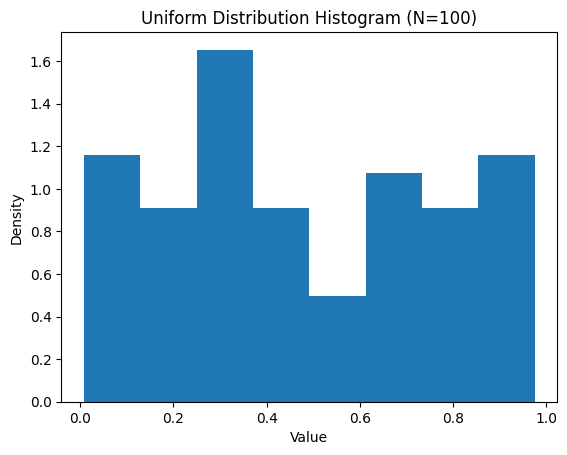

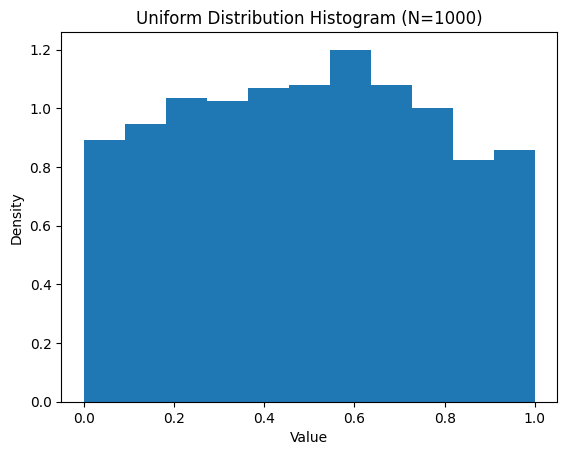

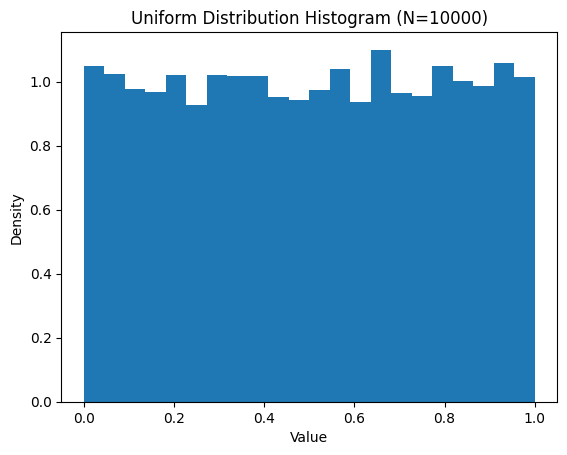

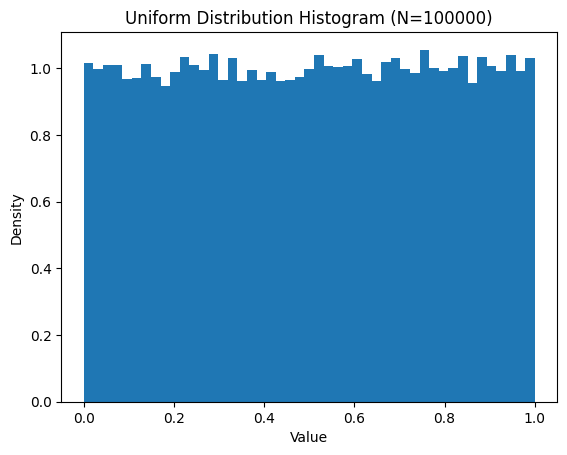

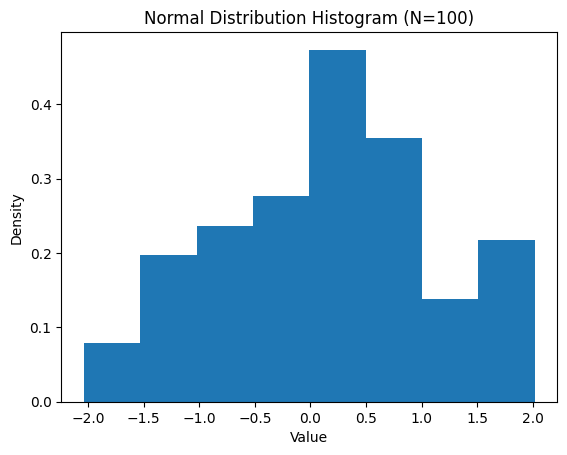

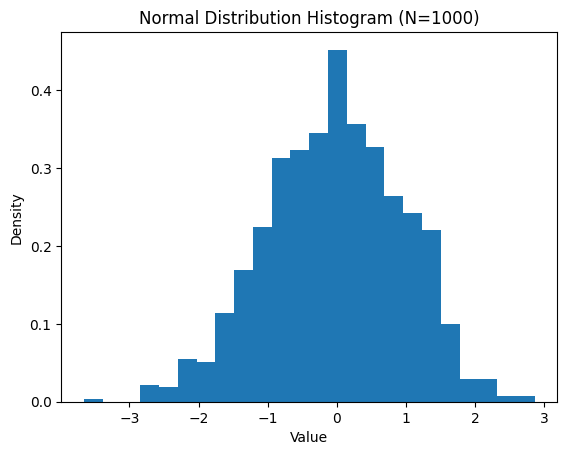

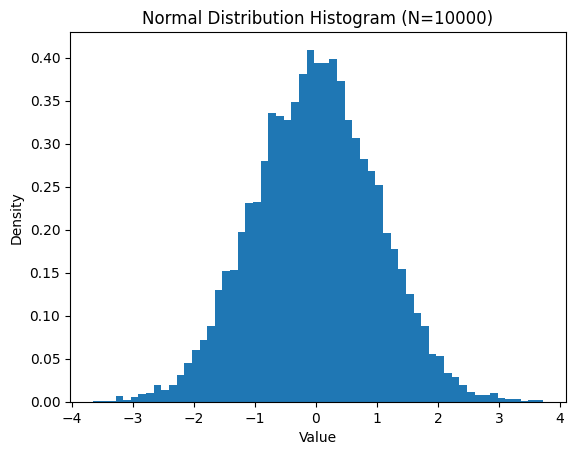

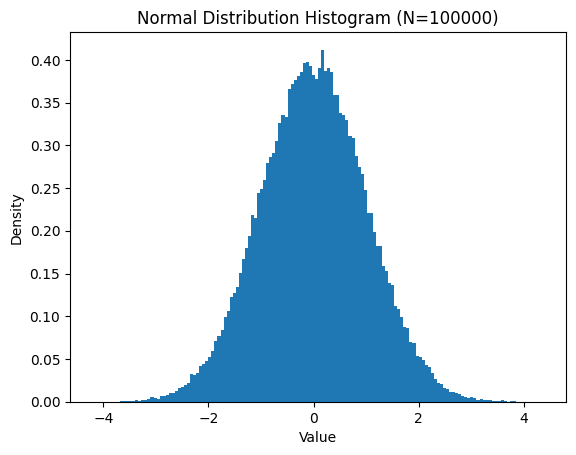

In [10]:
# Define a list of different N values to investigate the effect of sample size on histograms.
N_values = [100, 1000, 10000, 100000]

# Loop through each N value to generate and plot histograms for uniform distribution.
for N in N_values:
    # Generate N random numbers from a uniform distribution in [0, 1).
    x_uniform = np.random.random(N)
    # Create a new figure for each histogram.
    plt.figure()
    # Plot the histogram of the uniform data. 'bins='auto'' automatically determines bin edges.
    # 'density=True' normalizes the histogram so the area sums to 1.
    plt.hist(x_uniform, bins='auto', density=True)
    # Set the title of the histogram.
    plt.title(f'Uniform Distribution Histogram (N={N})')
    # Set the x-axis label.
    plt.xlabel('Value')
    # Set the y-axis label.
    plt.ylabel('Density')
    # Display the plot.
    plt.show()

# Comments for Normal distribution histograms section.
# Define mean (mu) and standard deviation (sigma) for the normal distribution.
mu = 0
sigma = 1

# Loop through each N value to generate and plot histograms for normal distribution.
for N in N_values:
    # Generate N random numbers from a normal (Gaussian) distribution with specified mean and standard deviation.
    x_normal = np.random.normal(loc=mu, scale=sigma, size=N)
    # Create a new figure for each histogram.
    plt.figure()
    # Plot the histogram of the normal data.
    plt.hist(x_normal, bins='auto', density=True)
    # Set the title of the histogram.
    plt.title(f'Normal Distribution Histogram (N={N})')
    # Set the x-axis label.
    plt.xlabel('Value')
    # Set the y-axis label.
    plt.ylabel('Density')
    # Display the plot.
    plt.show()

## Exercise 2

[7] Find $\pi$ using the method described in the introduction and plot a unit square to illustrate points which lie within the unit circle. It’s much faster to use the second method of making the random numbers, `x=random(N)`. You should plot data points within the circle in blue and those outside in green. Adapt code similar to that below to do the plotting.
```python
inpond = np.sqrt(x**2+y**2) <= 1.0 # True if in the pond
plt.plot(x[inpond==True], y[inpond==True],'b.')
```
 Compare the speed between using a `for` loop and using the vectorised `x=random(N)`.

Approximate value of pi using 100000 points: 3.13652


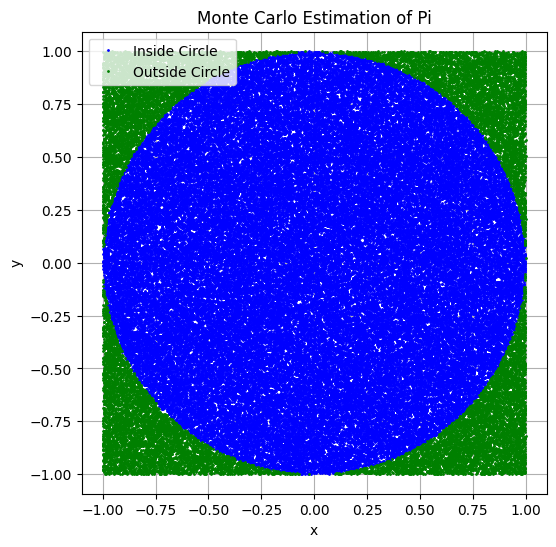


Comparing execution speed for N = 1000000:


In [11]:
# Set the total number of random points for the Monte Carlo estimation of Pi.
N = int(1e5)

# Generate N random x and y coordinates simultaneously. The values are in the range [-1, 1).
x, y = 2 * np.random.random((2, N)) - 1

# Calculate the radial distance from the origin for all points.
r = np.sqrt(x**2 + y**2)
# Create a boolean array where True indicates the point is inside or on the boundary of the unit circle.
in_circle = r <= 1.0

# Calculate the approximate value of pi.
# 'n' is the count of points inside the circle (sum of True values).
n = np.sum(in_circle)
# Pi is approximated as 4 * (number of points inside circle) / (total number of points).
pi_approx = 4 * n / N

# Print the calculated approximate value of pi.
print(f'Approximate value of pi using {N} points: {pi_approx}')

# Plotting the points to visualize the Monte Carlo method.
# Create a figure with a specific size for better visualization.
plt.figure(figsize=(6, 6))
# Plot points that are inside the circle in blue.
plt.plot(x[in_circle], y[in_circle], 'b.', markersize=2, label='Inside Circle')
# Plot points that are outside the circle in green.
plt.plot(x[~in_circle], y[~in_circle], 'g.', markersize=2, label='Outside Circle')
# Set the title of the plot.
plt.title('Monte Carlo Estimation of Pi')
# Set the x-axis label.
plt.xlabel('x')
# Set the y-axis label.
plt.ylabel('y')
# Ensure equal scaling for x and y axes to make the circle appear circular.
plt.axis('equal')
# Display the legend to differentiate between inside and outside points.
plt.legend()
# Add a grid to the plot for better readability.
plt.grid(True)
# Show the plot.
plt.show()

# Set a different N value for speed comparison in the next cell.
N_speed_test = int(1e6)

# Print a message indicating the start of the speed comparison.
print(f'\nComparing execution speed for N = {N_speed_test}:')

In [12]:
%%time
# This magic command measures the execution time of the entire cell.

# Using the vectorized approach for efficient random number generation and calculation.
# Generate N_speed_test random x and y coordinates in the range [-1, 1).
x_vec, y_vec = 2 * np.random.random((2, N_speed_test)) - 1
# Calculate the radial distance for all points in a vectorized manner.
r_vec = np.sqrt(x_vec**2 + y_vec**2)
# Count points inside the unit circle.
n_vec = np.sum(r_vec <= 1.0)
# Approximate pi.
pi_vec = 4 * n_vec / N_speed_test
# Print the approximation of pi obtained with the vectorized code.
print(f'Pi approximation with vectorized code: {pi_vec}')

Pi approximation with vectorized code: 3.138392
CPU times: user 45.7 ms, sys: 4.94 ms, total: 50.6 ms
Wall time: 51.9 ms


## Exercise 3

[9] Integrate $f(x) = sin(x)tan(x)$ between $0$ and $\pi/4$ using the MC method, and compare with the exact answer (obtained for instance via [WolframAlpha](https://www.wolframalpha.com/)). Investigate what happens with increasing the number of points $N$ you use by plotting the MC answer versus number of points, choosing appropriate values for $N$ and choice of axes.

 To get full marks you must avoid using a loop in the integration (but you can loop over different values of $N$).

Exact integral: 0.174266805832996
Approximate integral for N=100: 0.17308585097900145
Approximate integral for N=1000: 0.17544185071730725
Approximate integral for N=10000: 0.1741905808451342
Approximate integral for N=100000: 0.17470187440832505
Approximate integral for N=1000000: 0.17440037217886337


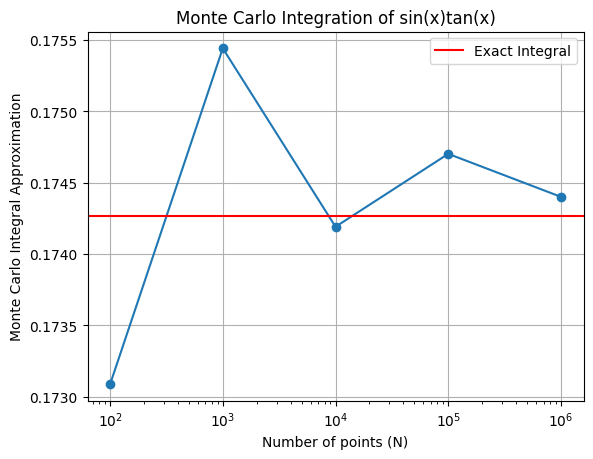

In [13]:
# Import numpy for numerical operations.
import numpy as np
# Import sympy for symbolic mathematics, including integration and symbolic pi.
import sympy
from sympy import integrate, pi
# Import matplotlib.pyplot for plotting.
import matplotlib.pyplot as plt

# Define the symbolic variable 'x' for sympy.
x_sym = sympy.Symbol('x')
# Define the function f(x) = sin(x)tan(x) symbolically.
f_sym = sympy.sin(x_sym) * sympy.tan(x_sym)
# Define the lower and upper limits of integration symbolically.
lower_limit_sym = 0
upper_limit_sym = pi/4

# Calculate the exact integral of f_sym over the defined limits using sympy.
exact_integral = integrate(f_sym, (x_sym, lower_limit_sym, upper_limit_sym))
# Print the numerical evaluation of the exact integral.
print(f'Exact integral: {exact_integral.evalf()}')

# Redefining the function for numerical evaluation using numpy arrays.
def f_numeric(x_arr):
    return np.sin(x_arr) * np.tan(x_arr)

# Define a range of N values to investigate how the MC integral approximation changes with the number of points.
N_values = [100, 1000, 10000, 100000, 1000000]
# Initialize an empty list to store the Monte Carlo integral results.
mc_integrals = []

# Convert symbolic limits to float for numerical calculations, handling cases where they might already be numeric.
lower_limit_num = float(lower_limit_sym) if not isinstance(lower_limit_sym, (int, float)) else lower_limit_sym
upper_limit_num = float(upper_limit_sym.evalf()) if not isinstance(upper_limit_sym, (int, float)) else upper_limit_sym


# Loop over different N values to perform Monte Carlo integration for each.
for N in N_values:
    # Generate N random numbers uniformly distributed within the integration interval [lower_limit_num, upper_limit_num].
    x_mc = lower_limit_num + (upper_limit_num - lower_limit_num) * np.random.random(N)

    # Calculate the average value of the function f_numeric at these random points.
    average_f = np.mean(f_numeric(x_mc))

    # Approximate the integral: (interval length) * (average function value).
    mc_integral = (upper_limit_num - lower_limit_num) * average_f
    # Store the approximate integral in the list.
    mc_integrals.append(mc_integral)
    # Print the approximate integral for the current N.
    print(f'Approximate integral for N={N}: {mc_integral}')

# Plot the Monte Carlo integral approximations versus the number of points N.
# Create a new figure for the plot.
plt.figure()
# Plot N_values on the x-axis and mc_integrals on the y-axis with markers and connecting lines.
plt.plot(N_values, mc_integrals, 'o-')
# Add a horizontal line representing the exact integral value for comparison.
plt.axhline(y=exact_integral.evalf(), color='r', linestyle='-', label='Exact Integral')
# Set the x-axis to a logarithmic scale to better visualize the trend with increasing N.
plt.xscale('log')
# Set the x-axis label.
plt.xlabel('Number of points (N)')
# Set the y-axis label.
plt.ylabel('Monte Carlo Integral Approximation')
# Set the title of the plot.
plt.title('Monte Carlo Integration of sin(x)tan(x)')
# Display the legend.
plt.legend()
# Add a grid to the plot.
plt.grid(True)
# Show the plot.
plt.show()